# 0. Multicolinealidad

* Ocurre cuando existe correlación entre dos o más variables regresoras
* Este análisis se hace antes del análisis de puntos influyentes

## 0.1 Causas

* **Relaciones lógicas o matemáticas entre variables**
Variables que están construidas a partir de otras
Ejemplo: población total y población urbana

* **Variables derivadas unas de otras**
Incluir tanto una variable como una versión transformada o combinada
Ejemplo: incluir tanto peso como el índice de masa corporal (IMC)

* **Variables naturalmente correlacionadas por contexto**
Algunas variables tienden a moverse juntas por razones sociales o económicas
Ejemplo: nivel educativo y salario

* **Redundancia por variables similares**
Incluir indicadores que miden aspectos muy parecidos
Ejemplo: gasto mensual y gasto anual

* **Tamaño de muestra pequeño**
Con pocos datos, las correlaciones entre variables explicativas se amplifican, generando efectos de colinealidad incluso con relaciones moderadas

## 0.2 Problemas que causa multicolinealidad

* Los estimadores de los coeficientes pueden cambiar drásticamente con pequeños cambios en los datos
* Cuando se incluyen covariables altamente correlacionadas en un modelo, los errores estándar de los coeficientes estimados tienden a aumentar de manera artificial. A este fenómeno se lo conoce como inflación de la varianza de los estimadores
* Los coeficientes pueden no resultar estadísticamente significativos, incluso cuando existe una relación real entre la variable dependiente y las variables explicativas

# 1. Problema

Un grupo de investigadores observó datos de presión arterial sistólica (en mm Hg) en una muestra de 20 personas diagnosticadas con hipertensión. El objetivo del estudio era evaluar si variables fisiológicas y conductuales pueden explicar las diferencias en los niveles de presión arterial entre individuos

Las variables registradas para cada persona fueron:

* **PA**: Presión arterial ( mm Hg) — variable dependiente
* **Age**: Edad del paciente (años)
* **Weigth**: Peso corporal (kg)
* **BSA** : Área de superficie corporal (m²)
* **Dur**: Duración de la hipertensión (años)
* **Pulse**: Pulso basal (pulsaciones por minuto)
* **Stress**: Índice de estrés percibido (escala numérica)

# 2. Objetivos del análisis

El propósito de este análisis es determinar si existe una relación estadísticamente significativa entre la presión arterial y alguna(s) de las variables predictoras mencionadas, utilizando un modelo de regresión lineal múltiple. Además, se evaluará la multicolinealidad entre las variables predictoras, ya que podría afectar la interpretación de los coeficientes del modelo

# 3. Lectura del conjunto de datos

In [36]:
library(ggplot2)
library(GGally)

In [37]:
setwd("/Users/ppando/Materias/data/materias/aprendizaje-automatico/bd")

In [38]:
presion <- read.delim('bloodpress.txt')

# 4. Exploración de las relaciones entre las variables

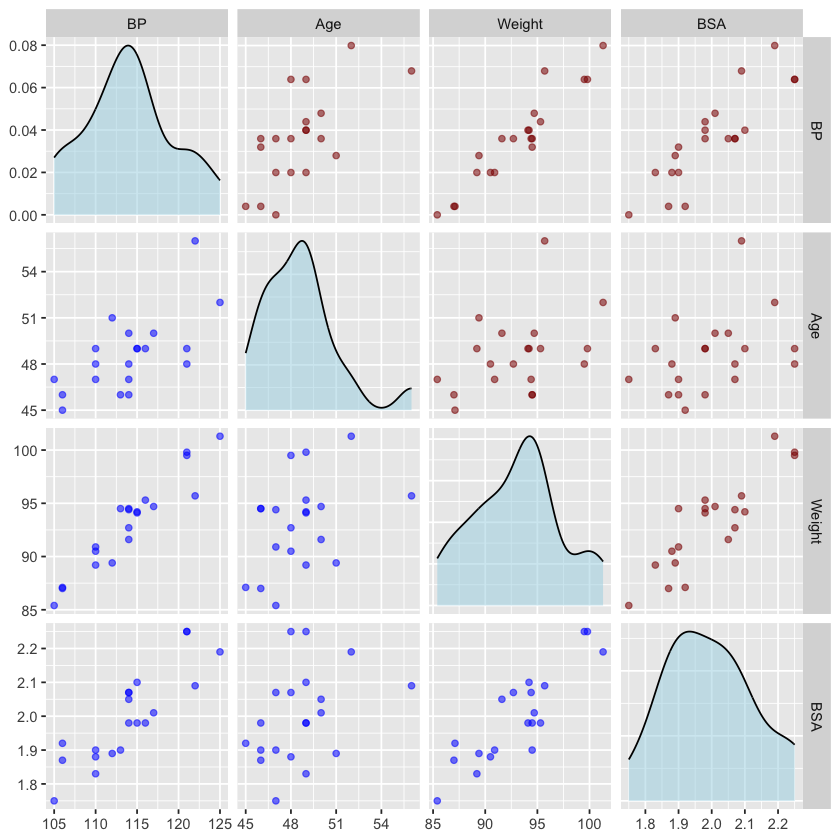

In [39]:
# Gráfico de dispersión entre las variables BP, Age, Weight, BSA
ggpairs(presion,
        columns = 2:5,
        mapping = aes(alpha = 0.9),
        upper = list(continuous = wrap("points", color = "darkred")),
        lower = list(continuous = wrap("points", color = "blue")),
        diag = list(continuous = wrap("densityDiag", fill = "lightblue")))

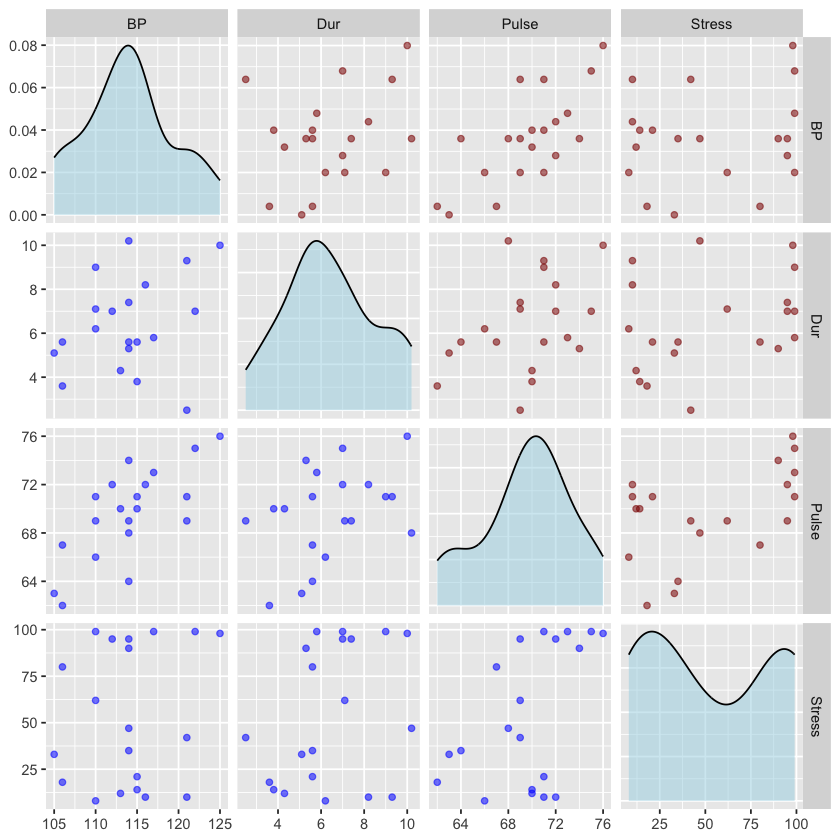

In [40]:
# Gráfico de dispersión entre las variables BP, Dur, Pulse, Stress
ggpairs(presion,
        columns = c(2, 6:8),
        mapping = aes(alpha = 0.9),
        upper = list(continuous = wrap("points", color = "darkred")),
        lower = list(continuous = wrap("points", color = "blue")),
        diag = list(continuous = wrap("densityDiag", fill = "lightblue")))

## 4.1 Interpretación de los resultados matriciales

* Estos gráficos nos permite investigar las diversas relaciones marginales entre la variable respuesta (BP) y los predictores. La variable BP parece estar estrechamente relacionada con Weigth y con Area de Superficie Corporal (BSA). No se observa una relación clara entre BP con la variable (Stress)
* Además, estos gráficos son útiles para identificar posibles asociaciones entre los predictores. Por ejemplo, las variables Weight y BSA muestran una fuerte correlación, lo que sugiere cierta redundancia entre ambas variables. En contraste, las variables Stress y BSA parecen no estar relacionados

* La siguiente matriz de correlación:

In [41]:
round(cor(presion), 2)

,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
Pt,1.00,0.03,0.04,0.02,-0.03,0.18,0.11,0.34
BP,0.03,1.00,0.66,0.95,0.87,0.29,0.72,0.16
Age,0.04,0.66,1.00,0.41,0.38,0.34,0.62,0.37
Weight,0.02,0.95,0.41,1.00,0.88,0.20,0.66,0.03
BSA,-0.03,0.87,0.38,0.88,1.00,0.13,0.46,0.02
Dur,0.18,0.29,0.34,0.20,0.13,1.00,0.40,0.31
Pulse,0.11,0.72,0.62,0.66,0.46,0.40,1.00,0.51
Stress,0.34,0.16,0.37,0.03,0.02,0.31,0.51,1.00


Se observa:
* una fuerte relación entre BP y Weight (𝑐𝑜𝑟=0.950)
* una fuerte relación entre BP y BSA (𝑐𝑜𝑟=0.866)
* la no existencia de una relación clara entre BP y Stress (𝑐𝑜𝑟=0.164)
* una fuerte relación entre las predictoras Weight y BSA (𝑐𝑜𝑟=0.875)
* ausencia de relación entre Stress y BSA (𝑐𝑜𝑟=0.018)


**La alta correlación entre algunos predictores sugiere que existe multicolinealidad basada en datos**
* Esto significa que una de las dos es redundante, porque una no aporta

# 5. Análisis del impacto de la multicolinealidad en el análisis de regresión

## 5.1 Predictores no correlacionados

* Regresión entre BP y Stress

In [42]:
modeloBP_S <- lm(BP ~ Stress, data = presion)
summary(modeloBP_S)


Call:
lm(formula = BP ~ Stress, data = presion)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6394 -3.3014  0.0722  2.2181  9.9287 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 112.71997    2.19345  51.389   <2e-16 ***
Stress        0.02399    0.03404   0.705     0.49    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.502 on 18 degrees of freedom
Multiple R-squared:  0.02686,	Adjusted R-squared:  -0.0272 
F-statistic: 0.4969 on 1 and 18 DF,  p-value: 0.4899


* Como BP y Stress no estan correlacionados, entonces el $R^2$ es chico

* Regresión entre BP y BSA

In [43]:
modeloBP_BSA <- lm(BP ~ BSA, data = presion)
summary(modeloBP_BSA)


Call:
lm(formula = BP ~ BSA, data = presion)

Residuals:
   Min     1Q Median     3Q    Max 
-5.314 -1.963 -0.197  1.934  4.831 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   45.183      9.392   4.811  0.00014 ***
BSA           34.443      4.690   7.343 8.11e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.79 on 18 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7358 
F-statistic: 53.93 on 1 and 18 DF,  p-value: 8.114e-07


* Como BP y BSA estan correlacionados, entonces el $R^2$ es grande

* Regresión entre BP y Stress+BSA

In [44]:
modeloBP_BSA_S <- lm(BP ~ BSA + Stress, data = presion)
summary(modeloBP_BSA_S)


Call:
lm(formula = BP ~ BSA + Stress, data = presion)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8992 -1.6483 -0.1643  1.7790  3.8524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 44.24452    9.26104   4.777 0.000175 ***
BSA         34.33423    4.61110   7.446 9.56e-07 ***
Stress       0.02166    0.01697   1.277 0.218924    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.743 on 17 degrees of freedom
Multiple R-squared:  0.7716,	Adjusted R-squared:  0.7448 
F-statistic: 28.72 on 2 and 17 DF,  p-value: 3.534e-06


* Como BP y (BSA + Stress) estan correlacionados, entonces el $R^2$ es grande
* Me dice que el p valor correspondiente a stress NO es significativo (puede ser porque la variable stress no tiene sentido que esté en el modelo)
* El aporte de stress no manifiesta una diferencia significativa

**Ecuaciones de regresión de los tres modelos:**

* modeloBP_S
$$\hat {𝐵𝑃} = 112.71 + 0.02399𝑆𝑡𝑟𝑒𝑠𝑠$$

* modeloBP_BSA
$$\hat {𝐵𝑃} = 45.183 + 34.443 𝐵𝑆𝐴$$

* modeloBP_BSA_S
$$\hat {𝐵𝑃} = 44.244 + 34.334 𝐵𝑆𝐴 + 0.02166 𝑆𝑡𝑟𝑒𝑠𝑠$$

* Se observa que los coeficientes de las variables en la Regresión Lineal Simple se mantienen en la Regresión Lineal Múltiple, eso porque las variables no estan correlacionadas

## 5.2 Predictores altamente correlacionados

Observamos que :

* Hay una fuerte relación entre las variables predictoras 𝑊𝑒𝑖𝑔ℎ𝑡 y 𝐵𝑆𝐴 (𝑐𝑜𝑟=0,875)


* Regresión entre BP y Weight

In [45]:
modeloBP_W <- lm(BP ~ Weight, data = presion)
summary(modeloBP_W)


Call:
lm(formula = BP ~ Weight, data = presion)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6933 -0.9318 -0.4935  0.7703  4.8656 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.20531    8.66333   0.255    0.802    
Weight       1.20093    0.09297  12.917 1.53e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.74 on 18 degrees of freedom
Multiple R-squared:  0.9026,	Adjusted R-squared:  0.8972 
F-statistic: 166.9 on 1 and 18 DF,  p-value: 1.528e-10


* Regresión entre BP y BSA

In [46]:
modeloBP_BSA <- lm(BP ~ BSA, data = presion)
summary(modeloBP_BSA)


Call:
lm(formula = BP ~ BSA, data = presion)

Residuals:
   Min     1Q Median     3Q    Max 
-5.314 -1.963 -0.197  1.934  4.831 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   45.183      9.392   4.811  0.00014 ***
BSA           34.443      4.690   7.343 8.11e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.79 on 18 degrees of freedom
Multiple R-squared:  0.7497,	Adjusted R-squared:  0.7358 
F-statistic: 53.93 on 1 and 18 DF,  p-value: 8.114e-07


* Regresión entre BP, BSA y Weight

In [47]:
modeloBP_BSA_W <- lm(BP ~ BSA + Weight, data = presion)
summary(modeloBP_BSA_W)


Call:
lm(formula = BP ~ BSA + Weight, data = presion)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8932 -1.1961 -0.4061  1.0764  4.7524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.6534     9.3925   0.602    0.555    
BSA           5.8313     6.0627   0.962    0.350    
Weight        1.0387     0.1927   5.392 4.87e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.744 on 17 degrees of freedom
Multiple R-squared:  0.9077,	Adjusted R-squared:  0.8968 
F-statistic: 83.54 on 2 and 17 DF,  p-value: 1.607e-09


**Ecuaciones de regresión de los tres modelos:**

* modeloBP_W
$$\hat {𝐵𝑃} = 2.2 + 1.20093 Weight$$

* modeloBP_BSA
$$\hat {𝐵𝑃} = 45.183 + 34.443 𝐵𝑆𝐴$$

* modeloBP_BSA_W
$$\hat {𝐵𝑃} = 5.6534 + 5.8313 𝐵𝑆𝐴 + 1.0387 Weight$$

* Cuando los predictores están altamente correlacionados, las respuestas que se obtienen dependen de los predictores del modelo
* Esto no es bueno, porque la interpretación del efecto de una variable manteniendo las otras fijas cambia
* No se mantienen los coeficientes entre el modelo simple como en el múltiple

# 6. Factor de inflación de la varianza - VIF

* Un método para detectar colinealidad entre las variables regresoras es el VIF (Factor de Inflación de la Varianza)
* Este factor se calcula para cada variable regresora
* El VIF para la k-ésima variable regresora se define:
$$VIF_k = \frac{1}{1 - R_k^2}$$

* $VIF_𝑘$ = 1 cuando $𝑅^2_𝑘$ = 0: la covariable $𝑋_𝑘$ no está correlacionada con las demás
* Si $𝑅^2_𝑘$ > 0, entonces $VIF_𝑘$ > 1: hay algún grado de colinealidad.
* Si $𝑅^2_𝑘$ ≈ 1, el $VIF_𝑘$ puede ser muy grande, indicando alta colinealidad.
* VIF > 10 -> indicio fuerte de multicolinealidad.
* 5 < VIF < 10 -> indicio de moderada multicolinealidad.

Otro criterio: si el promedio de los VIF es significativamente mayor a 1, también sugiere problemas de colinealidad.

## 6.1 Modelo con variables no correlacionadas

In [48]:
library(car)

In [49]:
vif(modeloBP_BSA_S)

BSA  Stress 
1.00034 1.00034

## 6.2 Modelo con variables correlacionadas

In [50]:
vif(modeloBP_BSA_W)

BSA   Weight 
4.276401 4.276401

## 6.3 Modelo sin considerar BSA

In [51]:
modelo1 <- lm(BP ~ Age + Weight + Dur + Stress, data = presion)
summary(modelo1)


Call:
lm(formula = BP ~ Age + Weight + Dur + Stress, data = presion)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11359 -0.29586  0.01515  0.27506  0.88674 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.869829   3.195296  -4.967 0.000169 ***
Age           0.683741   0.061195  11.173 1.14e-08 ***
Weight        1.034128   0.032672  31.652 3.76e-15 ***
Dur           0.039889   0.064486   0.619 0.545485    
Stress        0.002184   0.003794   0.576 0.573304    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5505 on 15 degrees of freedom
Multiple R-squared:  0.9919,	Adjusted R-squared:  0.9897 
F-statistic: 458.3 on 4 and 15 DF,  p-value: 1.764e-15


In [52]:
vif(modelo1)

Age   Weight      Dur   Stress 
1.468245 1.234653 1.200060 1.241117

## 6.3 Modelo sin considerar Weight

In [53]:
modelo2 <- lm(BP ~ Age + BSA + Dur + Stress, data = presion)
summary(modelo2)


Call:
lm(formula = BP ~ Age + BSA + Dur + Stress, data = presion)

Residuals:
   Min     1Q Median     3Q    Max 
-3.325 -1.017 -0.370  1.424  4.222 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.352625  10.454619   1.660  0.11771    
Age          0.789301   0.231167   3.414  0.00384 ** 
BSA         28.579243   3.836945   7.448 2.05e-06 ***
Dur          0.192924   0.243767   0.791  0.44103    
Stress      -0.001021   0.014385  -0.071  0.94435    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.091 on 15 degrees of freedom
Multiple R-squared:  0.8829,	Adjusted R-squared:  0.8517 
F-statistic: 28.27 on 4 and 15 DF,  p-value: 7.875e-07


In [54]:
vif(modelo2)

Age      BSA      Dur   Stress 
1.452146 1.191842 1.188539 1.236873

# 7. Predicciones

## 7.1 Modelo 1

In [55]:
data_frame1 <- data.frame(Age = 46, Weight = 95, Dur = 5.5, Stress = 91)
predict(modelo1, data_frame1)

1 
114.2426

## 7.2 Modelo 2

In [56]:
data_frame2 <- data.frame(Age = 46, BSA = 2.07, Dur = 5.5, Stress = 91)
predict(modelo2, data_frame2)

1 
113.7877

* ¿Qué modelo elegir?

# 8. Conclusión

* Es importante hacer un análisis de multicolinealidad antes de hacer el análisis del supuesto del modelo
* Porque la presencia de variables altamente correlacionadas puede cambiar los estimadores, como sus errores estandard

# 9. Importancia del Test F en la regresión lineal múltiple

## 9.1 Test F global vs. tests t individuales

| Tipo de test | ¿Qué evalúa? | Interpretación |
| -- | -- | -- |
| Test F global | Evalúa si alguna variable predictora es significativa | Responde si el modelo completo es útil |
| Tests individuales | Evalúan si cada predictor individualmente aporta información significativa al modelo, condicionado a los otros | Responde si un predictor mejora el modelo dado que los demás están presentes |

## 9.2 Ejemplo clásico: multicolinealidad 

En presencia de multicolinealidad, los predictores están altamente correlacionados entre sí. En este caso:

* El modelo completo puede ser útil para predecir la respuesta (test F significativo)
* Pero ningún predictor individual parece importante (tests t no significativos), porque comparten información redundante

Esto se debe a que la varianza explicada por un predictor no se puede distinguir claramente de la explicada por los otros, lo que aumenta el error estándar de los coeficientes individuales.

In [57]:
# Cargar librerías necesarias
library(tidyverse)

# Simular datos con multicolinealidad
set.seed(123)
n <- 100
x1 <- rnorm(n)
x2 <- x1 + rnorm(n, sd = 0.01)  # muy similar a x1
x3 <- x1 + rnorm(n, sd = 0.01)  # también muy similar

# Variable respuesta relacionada con x1
y <- 3 + 2 * x1 + rnorm(n)

# Armar data frame
datos <- data.frame(y, x1, x2, x3)

# Ajustar modelo de regresión múltiple
modelo <- lm(y ~ x1 + x2 + x3, data = datos)

# Mostrar resumen del modelo
summary(modelo)


Call:
lm(formula = y ~ x1 + x2 + x3, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49138 -0.65392  0.05664  0.67033  2.53210 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9807     0.1073  27.768   <2e-16 ***
x1            3.0614    15.4702   0.198    0.844    
x2            4.6218    10.9456   0.422    0.674    
x3           -5.7387    11.2231  -0.511    0.610    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.052 on 96 degrees of freedom
Multiple R-squared:  0.7474,	Adjusted R-squared:  0.7395 
F-statistic: 94.69 on 3 and 96 DF,  p-value: < 2.2e-16


## 9.3 Conclusión

* Aunque los coeficientes individuales no sean significativos, un test F significativo indica que el conjunto de predictores aporta valor explicativo al modelo

* Por lo tanto, ambos tipos de test son complementarios y deben analizarse conjuntamente para obtener una visión completa del modelo